In [1]:
import os
import sys

sys.path.append(os.path.abspath('..'))
import modules.io as io
import matplotlib.pyplot as plt
import numpy as np

import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import tensorflow as tf

In [2]:
DATA_KEY    = "TRAIN"
CONFIG_FILE = '../config/googlenet_c30_train300k_aug10_clean_point.yaml'
LOAD = True

config      = io.load_yaml(CONFIG_FILE)

SCALE = config['CROP_DIMS']/2*config['SPACING']

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

5it [00:00, 46.81it/s]

centering images


7860it [02:54, 45.15it/s]
100%|██████████| 9689/9689 [01:46<00:00, 90.68it/s]


In [4]:
X = data[0]
Y = data[1]
m = data[2]

print(X.shape)
print(Y.shape)

(9689, 160, 160)
(9689, 30)


In [5]:
print(Y[10])

[0.51072401 0.49305332 0.06274995 0.05910298 0.0576106  0.05483217
 0.05262407 0.05151511 0.05051653 0.0491177  0.04820836 0.04839852
 0.04932706 0.05001125 0.0498638  0.04945409 0.04957293 0.05057316
 0.05228095 0.05379185 0.05399104 0.05335733 0.05412775 0.05642257
 0.05739686 0.05609283 0.05420422 0.05310023 0.05291321 0.05527569]


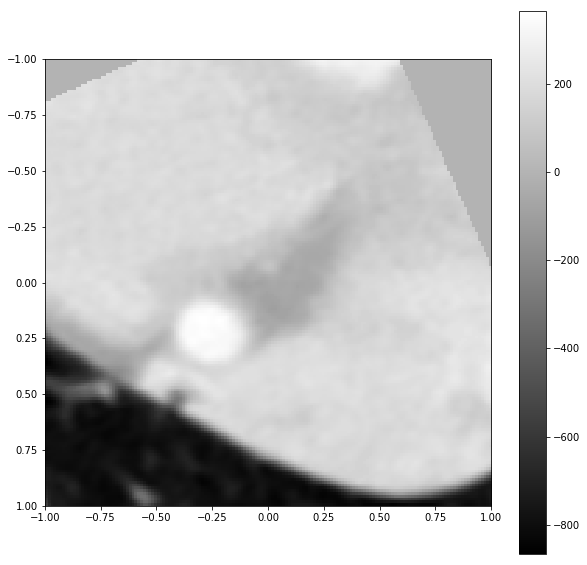

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(X[1], extent=[-1,1,1,-1], cmap='gray')
plt.colorbar()
plt.show()

In [9]:
import modules.vessel_regression as vr

c = vr.point_pred_to_contour(Y[1])

print(c)

[[-0.44128662  0.17094619]
 [-0.42995953  0.13215845]
 [-0.40684475  0.09940689]
 [-0.37572241  0.07563813]
 [-0.34201141  0.05962973]
 [-0.30825356  0.04840458]
 [-0.27404527  0.0400588 ]
 [-0.23801986  0.03574396]
 [-0.2012766   0.04095489]
 [-0.16838389  0.05844144]
 [-0.14119578  0.08349351]
 [-0.11868956  0.1124331 ]
 [-0.09998833  0.14452091]
 [-0.08610946  0.18033666]
 [-0.08122773  0.21949715]
 [-0.09043075  0.25806202]
 [-0.11207516  0.29093871]
 [-0.13985827  0.31710522]
 [-0.17052294  0.33755671]
 [-0.20343     0.35252608]
 [-0.23833854  0.36118065]
 [-0.27432299  0.36240761]
 [-0.30988142  0.35599843]
 [-0.34383786  0.34278369]
 [-0.37524651  0.32314352]
 [-0.40256816  0.29696416]
 [-0.423944    0.26474373]
 [-0.43779043  0.22779206]]


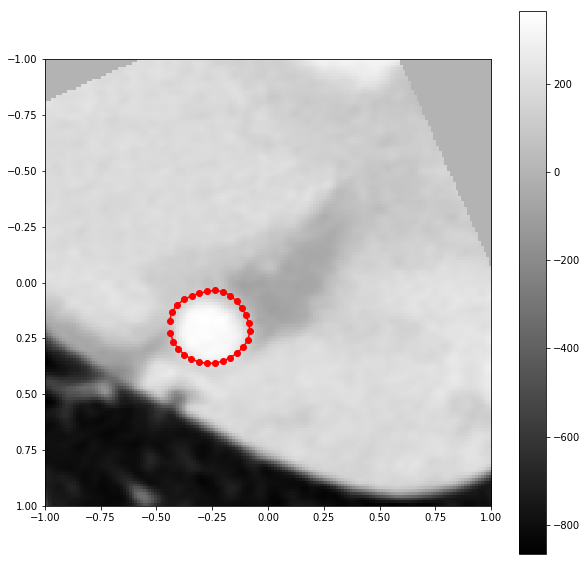

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(X[1], extent=[-1,1,1,-1], cmap='gray')
plt.plot(c[:,0], c[:,1], color='r',marker='o')
plt.colorbar()
plt.show()